## Homework 6

Justin Lau

## Imports

In [89]:
import numpy as np
import math
from scipy.special import legendre
import scipy.integrate as integrate
from sympy import var
import matplotlib.pyplot as plt

## Question 2 and 4 are on pdf

## Question 4 Part A
Using numbers from python to double check work on the pdf

In [86]:
polynomials = []
n = []
for i in range(5):
    polynomials.append(legendre(i))
    n.append(i)
x = var('x')
#Finding the Legendre polynomials using the scipy.special.legendre package just to check answers worked out on pdf
P0 = polynomials[0][0]
P1 = polynomials[1][1]*x + polynomials[1][0]
P2 = polynomials[2][2]*x**2 + polynomials[2][1]*x + polynomials[2][0]
P3 = polynomials[3][3]*x**3 + polynomials[3][2]*x**2 + polynomials[3][1]*x + polynomials[3][0]
P4 = polynomials[4][4]*x**4 + polynomials[4][3]*x**3 + polynomials[4][2]*x**2 + polynomials[4][1]*x + polynomials[4][0]
P = [P0, P1, P2, P3, P4]

In [87]:
for i in range(len(P)):
    print('For n = %i' %i, P[i])

For n = 0 1.0
For n = 1 1.0*x
For n = 2 1.5*x**2 - 0.5
For n = 3 2.5*x**3 - 1.5*x
For n = 4 4.375*x**4 + 4.85722573273506e-16*x**3 - 3.75*x**2 + 2.42861286636753e-16*x + 0.375


## Part B

In [67]:
#Finding the function e^x * legendre polynomial alongside just (legendre polynomial)^2
def B_coefficients(degree):
    if degree == 0:
        e = lambda x: np.exp(x)*(polynomials[degree][degree])
        p = lambda x: polynomials[0][0]**2
        return e,p
    if degree == 1:
        e = lambda x: np.exp(x)*(polynomials[degree][degree]*x + polynomials[degree][degree-1])
        p = lambda x: (polynomials[degree][degree]*x + polynomials[degree][degree-1])**2
        return e,p    
    if degree == 2:
        e = lambda x: np.exp(x)*(polynomials[degree][degree]*x**2 + polynomials[degree][degree-1]*x + polynomials[degree][degree-2])
        p = lambda x: (polynomials[degree][degree]*x**2 + polynomials[degree][degree-1]*x + polynomials[degree][degree-2])**2
        return e,p
    if degree == 3:
        e = lambda x: np.exp(x)*(polynomials[degree][degree]*x**3 + polynomials[degree][degree-1]*x**2 + polynomials[degree][degree-2]*x + polynomials[degree][degree-3])
        p = lambda x: (polynomials[degree][degree]*x**3 + polynomials[degree][degree-1]*x**2 + polynomials[degree][degree-2]*x + polynomials[degree][degree-3])**2
    return e,p  

In [68]:
#performing integration of the functions found in [-1,1]
def Least_squares(degree):
    B = []
    for i in range(degree):
        B.append(integrate.quad(B_coefficients(i)[0],-1,1)[0]/integrate.quad(B_coefficients(i)[1], -1, 1)[0])
    return B
Least_squares(4)

[1.1752011936438014,
 1.103638323514327,
 0.3578143506473725,
 0.07045563366848857]

In [81]:
B = Least_squares(4)
least = 0
for i in range(len(B)):
    least += B[i]*P[i]
least

0.176139084171221*x**3 + 0.536721525971059*x**2 + 0.997954873011594*x + 0.996294018320115

## Part C

In [57]:
x = var('x')
degree = 4
polynomials[degree][degree]*x**4 + polynomials[degree][degree-1]*x**3 + polynomials[degree][degree-2]*x**2 + polynomials[degree][degree-3]**1 + polynomials[degree][degree-4]

4.375*x**4 + 4.85722573273506e-16*x**3 - 3.75*x**2 + 0.375

In [82]:
#same as before just switching out e^x for x^3
def new_B(degree):
    if degree == 0:
        e = lambda x: x**3*(polynomials[degree][degree])
        p = lambda x: polynomials[0][0]**2
        return e,p
    if degree == 1:
        e = lambda x: x**3*(polynomials[degree][degree]*x + polynomials[degree][degree-1])
        p = lambda x: (polynomials[degree][degree]*x + polynomials[degree][degree-1])**2
        return e,p    
    if degree == 2:
        e = lambda x: x**3*(polynomials[degree][degree]*x**2 + polynomials[degree][degree-1]*x + polynomials[degree][degree-2])
        p = lambda x: (polynomials[degree][degree]*x**2 + polynomials[degree][degree-1]*x + polynomials[degree][degree-2])**2
        return e,p
    if degree == 3:
        e = lambda x: x**3*(polynomials[degree][degree]*x**3 + polynomials[degree][degree-1]*x**2 + polynomials[degree][degree-2]*x + polynomials[degree][degree-3])
        p = lambda x: (polynomials[degree][degree]*x**3 + polynomials[degree][degree-1]*x**2 + polynomials[degree][degree-2]*x + polynomials[degree][degree-3])**2
    if degree == 4:
        e = lambda x: x**3*(polynomials[degree][degree]*x**4 + polynomials[degree][degree-1]*x**3 + polynomials[degree][degree-2]*x**2 + polynomials[degree][degree-3]**1 + polynomials[degree][degree-4])**2
        p = lambda x: (polynomials[degree][degree]*x**4 + polynomials[degree][degree-1]*x**3 + polynomials[degree][degree-2]*x**2 + polynomials[degree][degree-3]**1 + polynomials[degree][degree-4])**2
    return e,p  

In [84]:
def new_Least_squares(degree):
    B = []
    for i in range(degree):
        B.append(integrate.quad(new_B(i)[0],-1,1)[0]/integrate.quad(new_B(i)[1], -1, 1)[0])
    return B
new_Least_squares(5)

[0.0, 0.6000000000000001, 0.0, 0.39999999999999974, 4.046863357693871e-16]

In [85]:
B = new_Least_squares(5)
least = 0
for i in range(len(B)):
    least += B[i]*P[i]
least

1.77050271899107e-15*x**4 + 0.999999999999999*x**3 - 1.5175737591352e-15*x**2 + 3.33066907387547e-16*x + 1.5175737591352e-16

## Question 5

[]

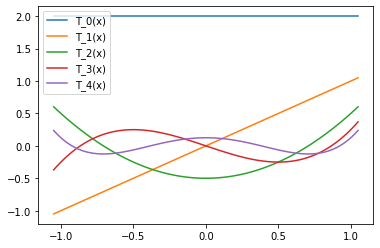

In [105]:
#Using function created for Homework 2 Question 7

#Creating a chebyshev polynomial
def cheby(n,x):
    #values for if n = 0 and n = x
    T = [1,x]
    if n == 0:
        return np.ones(len(x))
    # create new chebyshev polynomial until desired n value is reached
    count = 1
    while(count < n):
        #store all chebyshev polynomials in sequential order
        T.append(2*x*T[count]-T[count-1])
        count = count + 1
    return T[count]

#range of x that has the best visual representation
x = np.linspace(-1.05,1.05,100)

for i in range(5):
    T = 'T_'
    ix = '(x)'
    #a monic chebyshev polynomial is Tn*(1/2^(n-1))
    plt.plot(x,1/(2**(i-1))*cheby(i,x), label = T+str(i)+ix)
plt.legend()
plt.plot()